Epoch 1/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 198s 271ms/step - accuracy: 0.8883 - loss: 0.4274 - val_accuracy: 0.9742 - val_loss: 0.0616 - learning_rate: 0.0010
Epoch 2/20


E0000 00:00:1749098002.646253      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749098002.901540      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


622/622 ━━━━━━━━━━━━━━━━━━━━ 174s 256ms/step - accuracy: 0.9846 - loss: 0.0406 - val_accuracy: 0.9935 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 3/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 159s 256ms/step - accuracy: 0.9884 - loss: 0.0308 - val_accuracy: 0.9938 - val_loss: 0.0151 - learning_rate: 0.0010
Epoch 4/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.9912 - loss: 0.0230

E0000 00:00:1749098469.002546      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749098469.235789      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749098469.844523      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749098470.100826      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


622/622 ━━━━━━━━━━━━━━━━━━━━ 166s 267ms/step - accuracy: 0.9912 - loss: 0.0230 - val_accuracy: 0.9397 - val_loss: 0.1516 - learning_rate: 0.0010
Epoch 5/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 159s 255ms/step - accuracy: 0.9894 - loss: 0.0288 - val_accuracy: 0.9855 - val_loss: 0.0287 - learning_rate: 0.0010
Epoch 6/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 160s 257ms/step - accuracy: 0.9903 - loss: 0.0236 - val_accuracy: 0.9938 - val_loss: 0.0128 - learning_rate: 0.0010
Epoch 7/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 158s 255ms/step - accuracy: 0.9903 - loss: 0.0259 - val_accuracy: 0.9967 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 8/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 159s 256ms/step - accuracy: 0.9929 - loss: 0.0172 - val_accuracy: 0.9894 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 9/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 159s 255ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9978 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 10/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 159s 256ms/step - accuracy: 0.9957

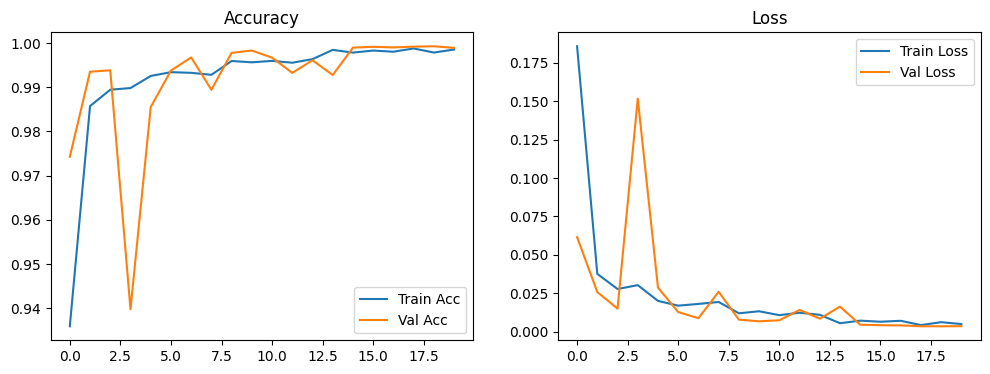

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


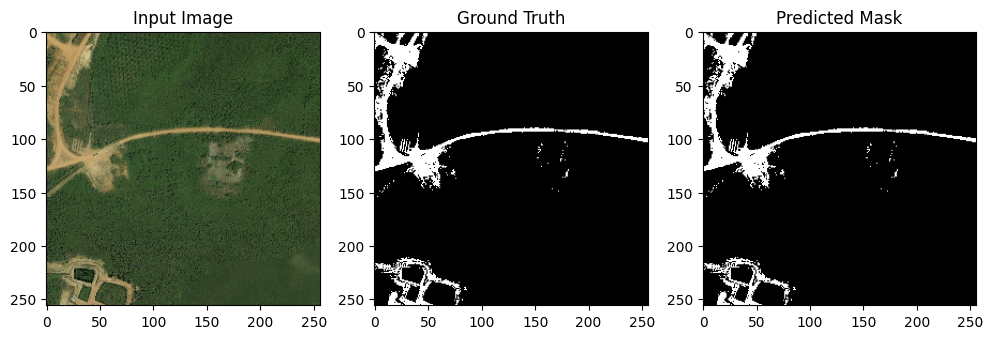

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


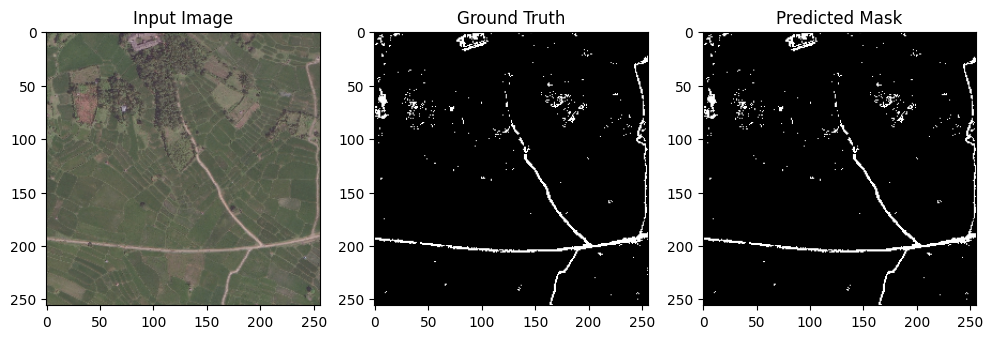

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


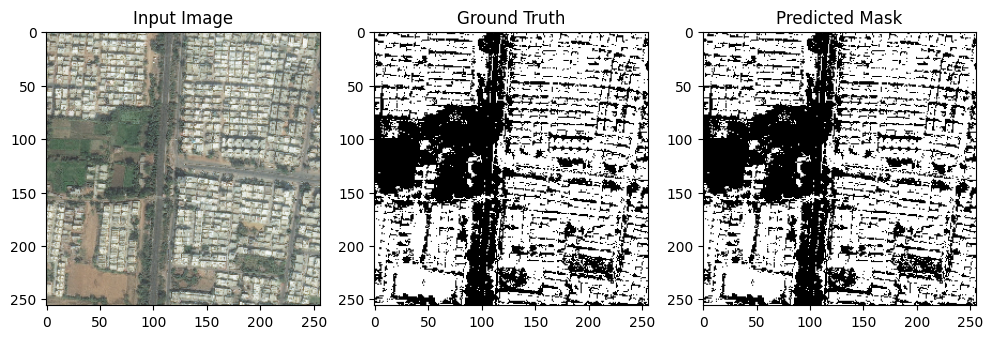

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


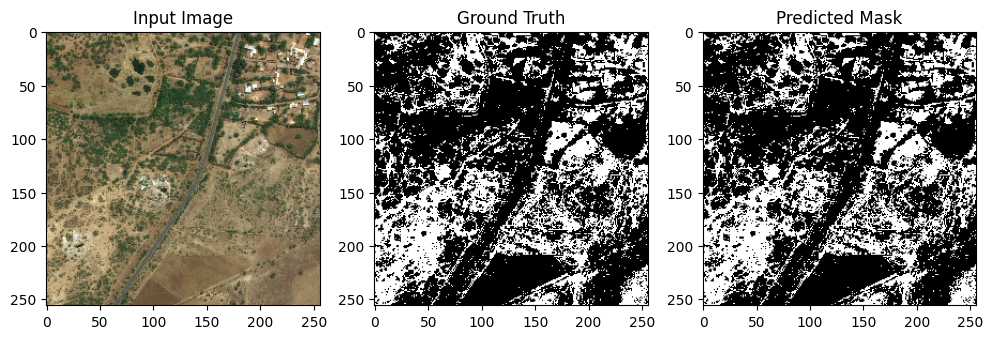

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

# ============================
# CONFIG
# ============================
IMG_HEIGHT, IMG_WIDTH = 256, 256
BATCH_SIZE = 8
EPOCHS = 20
IMAGE_DIR = '/kaggle/input/deepglobe-road-extraction-dataset/train'

# ============================
# Load and Split Dataset
# ============================
image_paths = sorted([os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if "_mask" not in f])
mask_paths = [p.replace(".png", "_mask.png") for p in image_paths]

train_images, val_images, train_masks, val_masks = train_test_split(image_paths, mask_paths, test_size=0.2, random_state=42)

# ============================
# Data Generator with Augmentation
# ============================
def load_image_mask(image_path, mask_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img) / 255.0
    mask = load_img(mask_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
    mask = img_to_array(mask)
    mask = (mask > 127).astype(np.float32)
    return img, mask

def data_generator(image_list, mask_list, augment=False):
    while True:
        for i in range(0, len(image_list), BATCH_SIZE):
            batch_images = image_list[i:i+BATCH_SIZE]
            batch_masks = mask_list[i:i+BATCH_SIZE]
            imgs, masks = [], []
            for img_path, mask_path in zip(batch_images, batch_masks):
                img, mask = load_image_mask(img_path, mask_path)
                
                # Augmentation
                if augment and np.random.rand() > 0.5:
                    img = np.fliplr(img)
                    mask = np.fliplr(mask)

                imgs.append(img)
                masks.append(mask)
            yield np.array(imgs), np.array(masks)

# ============================
# U-Net Model
# ============================
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D()(c3)

    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D()(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.UpSampling2D()(c5)
    u6 = layers.Concatenate()([u6, c4])
    c6 = layers.Conv2D(512, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, 3, activation='relu', padding='same')(c6)

    u7 = layers.UpSampling2D()(c6)
    u7 = layers.Concatenate()([u7, c3])
    c7 = layers.Conv2D(256, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, 3, activation='relu', padding='same')(c7)

    u8 = layers.UpSampling2D()(c7)
    u8 = layers.Concatenate()([u8, c2])
    c8 = layers.Conv2D(128, 3, activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, 3, activation='relu', padding='same')(c8)

    u9 = layers.UpSampling2D()(c8)
    u9 = layers.Concatenate()([u9, c1])
    c9 = layers.Conv2D(64, 3, activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, 3, activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c9)

    return models.Model(inputs, outputs)

# ============================
# Compile Model
# ============================
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ============================
# Train the Model
# ============================
train_gen = data_generator(train_images, train_masks, augment=True)
val_gen = data_generator(val_images, val_masks)

steps_per_epoch = len(train_images) // BATCH_SIZE
val_steps = len(val_images) // BATCH_SIZE

callbacks = [
    ReduceLROnPlateau(patience=3, factor=0.5, verbose=1),
    EarlyStopping(patience=6, restore_best_weights=True)
]

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=EPOCHS,
    callbacks=callbacks
)

model.save("unet_road_segmentation.h5")

# ============================
# Plot Accuracy & Loss
# ============================
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

# ============================
# Visualize Predictions
# ============================
def visualize_predictions(model, image_paths, mask_paths, count=4):
    indices = np.random.choice(len(image_paths), count)
    for idx in indices:
        img, true_mask = load_image_mask(image_paths[idx], mask_paths[idx])
        pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
        pred_mask = (pred_mask > 0.5).astype(np.uint8)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title("Input Image")

        plt.subplot(1, 3, 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title("Ground Truth")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask.squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.show()

visualize_predictions(model, val_images, val_masks)


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix_heatmap(model, image_paths, mask_paths, threshold=0.5, samples=100):
    y_true_all = []
    y_pred_all = []

    for i in range(min(samples, len(image_paths))):
        img, true_mask = load_image_mask(image_paths[i], mask_paths[i])
        pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
        pred_mask = (pred_mask > threshold).astype(np.uint8)

        y_true_all.extend(true_mask.flatten())
        y_pred_all.extend(pred_mask.flatten())

    cm = confusion_matrix(y_true_all, y_pred_all)
    labels = ['Background', 'Road']

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Pixel-wise Confusion Matrix - Road Segmentation')
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=labels))

    return cm


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

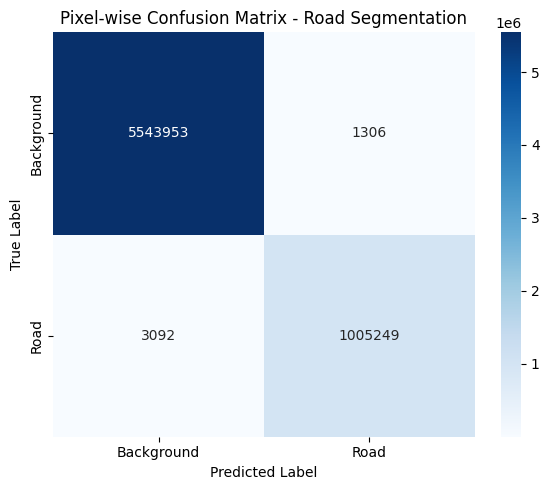

Classification Report:
              precision    recall  f1-score   support

  Background       1.00      1.00      1.00   5545259
        Road       1.00      1.00      1.00   1008341

    accuracy                           1.00   6553600
   macro avg       1.00      1.00      1.00   6553600
weighted avg       1.00      1.00      1.00   6553600



In [22]:
cm = plot_confusion_matrix_heatmap(model, val_images, val_masks)


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Paths
IMAGE_DIR = '/kaggle/input/deepglobe-road-extraction-dataset/train'
IMG_HEIGHT, IMG_WIDTH = 256, 256
BATCH_SIZE = 8
EPOCHS = 5

# Load image and mask paths
image_paths = sorted([os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if "_mask" not in f])
mask_paths = [p.replace(".png", "_mask.png") for p in image_paths]

# Split data
train_images, val_images, train_masks, val_masks = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42)

# Data loader
def load_image_mask(image_path, mask_path):
    image = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image = img_to_array(image) / 255.0

    mask = load_img(mask_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode="grayscale")
    mask = img_to_array(mask)
    mask = (mask > 127).astype(np.float32)
    return image, mask

def data_generator(image_list, mask_list):
    while True:
        for i in range(0, len(image_list), BATCH_SIZE):
            batch_images = image_list[i:i+BATCH_SIZE]
            batch_masks = mask_list[i:i+BATCH_SIZE]
            imgs, masks = zip(*(load_image_mask(img, msk) for img, msk in zip(batch_images, batch_masks)))
            yield np.array(imgs), np.array(masks)

def dense_attention_bridge(skip, upsample):
    # Global context from both sides
    skip_gap = layers.GlobalAveragePooling2D()(skip)
    up_gap = layers.GlobalAveragePooling2D()(upsample)

    # Dense transformation
    skip_dense = layers.Dense(64, activation='relu')(skip_gap)
    up_dense = layers.Dense(64, activation='relu')(up_gap)

    # Attention merge
    merged = layers.Concatenate()([skip_dense, up_dense])
    attention_vector = layers.Dense(upsample.shape[-1], activation='sigmoid')(merged)

    # Expand to match spatial dims
    attention = layers.Reshape((1, 1, upsample.shape[-1]))(attention_vector)
    attended = layers.Multiply()([upsample, attention])
    return attended


# Build model
inputs = tf.keras.Input(shape=(256, 256, 3))

# Encoder
c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
c1 = layers.MaxPooling2D()(c1)

c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
c2 = layers.MaxPooling2D()(c2)

c3 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
c3 = layers.MaxPooling2D()(c3)

# Bottleneck
b = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)

# Decoder with dense attention fusion
u1 = layers.UpSampling2D()(b)
att1 = dense_attention_bridge(c3, u1)
u1 = layers.Concatenate()([u1, att1])
u1 = layers.Conv2D(128, 3, activation='relu', padding='same')(u1)

u2 = layers.UpSampling2D()(u1)
att2 = dense_attention_bridge(c2, u2)
u2 = layers.Concatenate()([u2, att2])
u2 = layers.Conv2D(64, 3, activation='relu', padding='same')(u2)

u3 = layers.UpSampling2D()(u2)
att3 = dense_attention_bridge(c1, u3)
u3 = layers.Concatenate()([u3, att3])
u3 = layers.Conv2D(32, 3, activation='relu', padding='same')(u3)

outputs = layers.Conv2D(1, 1, activation='sigmoid')(u3)

model = models.Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
train_gen = data_generator(train_images, train_masks)
val_gen = data_generator(val_images, val_masks)

steps_per_epoch = len(train_images) // BATCH_SIZE
val_steps = len(val_images) // BATCH_SIZE

history = model.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=EPOCHS)

model.save("road_attention_unet.h5")



Epoch 1/5


I0000 00:00:1749188902.792176      96 service.cc:148] XLA service 0x7b6d24001610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749188902.792949      96 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749188903.585810      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/622 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.2974 - loss: 0.6858   

I0000 00:00:1749188911.313030      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


622/622 ━━━━━━━━━━━━━━━━━━━━ 261s 394ms/step - accuracy: 0.8588 - loss: 0.3320 - val_accuracy: 0.9113 - val_loss: 0.1956
Epoch 2/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 140s 216ms/step - accuracy: 0.9138 - loss: 0.1898 - val_accuracy: 0.9176 - val_loss: 0.1825
Epoch 3/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.9202 - loss: 0.1761 - val_accuracy: 0.9258 - val_loss: 0.1655
Epoch 4/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 129s 208ms/step - accuracy: 0.9267 - loss: 0.1623 - val_accuracy: 0.9302 - val_loss: 0.1553
Epoch 5/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 149s 239ms/step - accuracy: 0.9307 - loss: 0.1534 - val_accuracy: 0.9334 - val_loss: 0.1476


NameError: name 'plt' is not defined

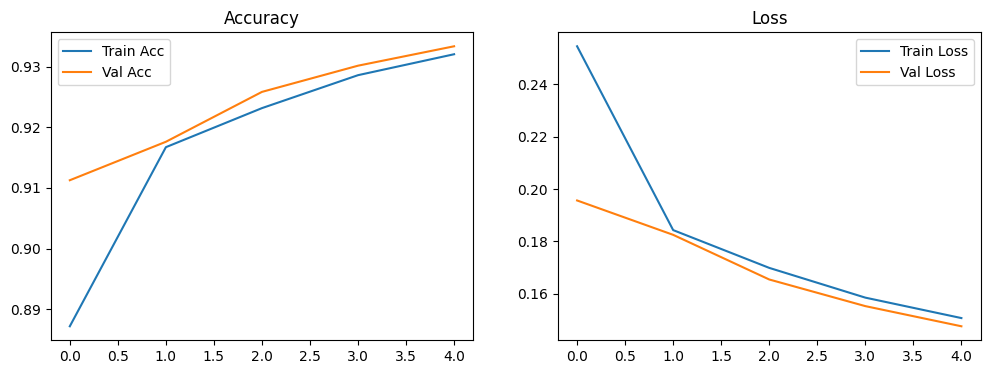

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


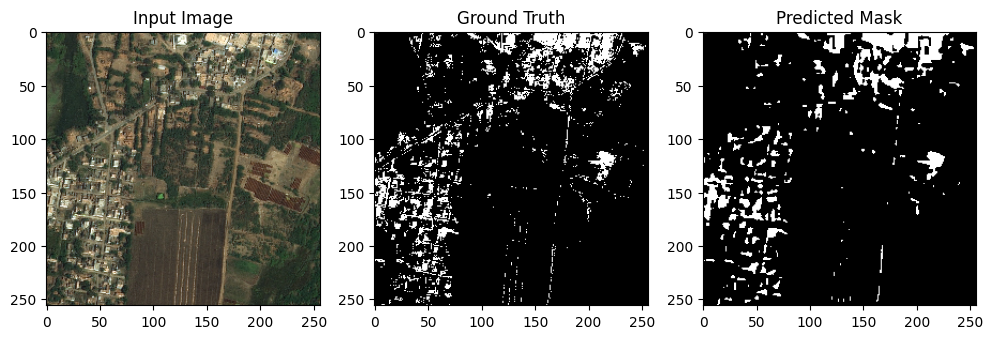

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


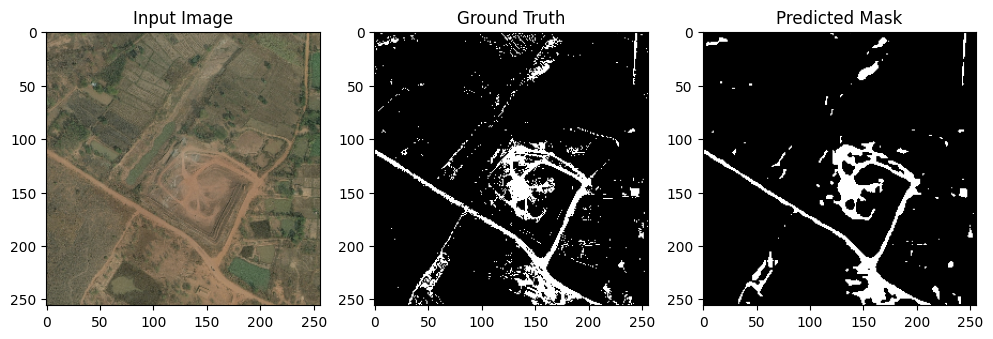

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


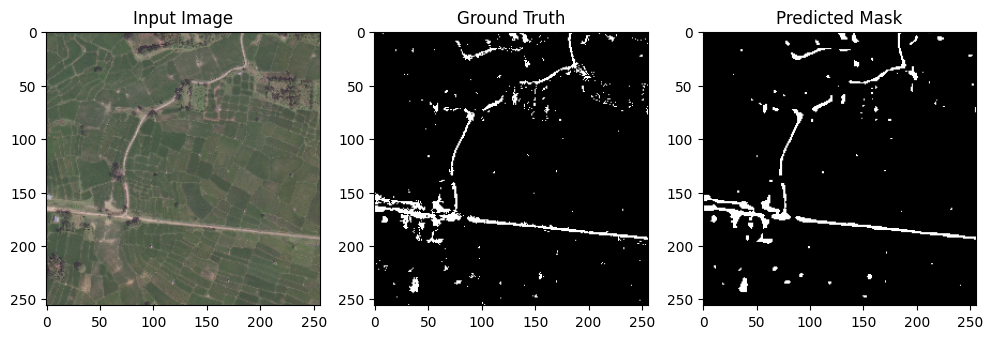

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


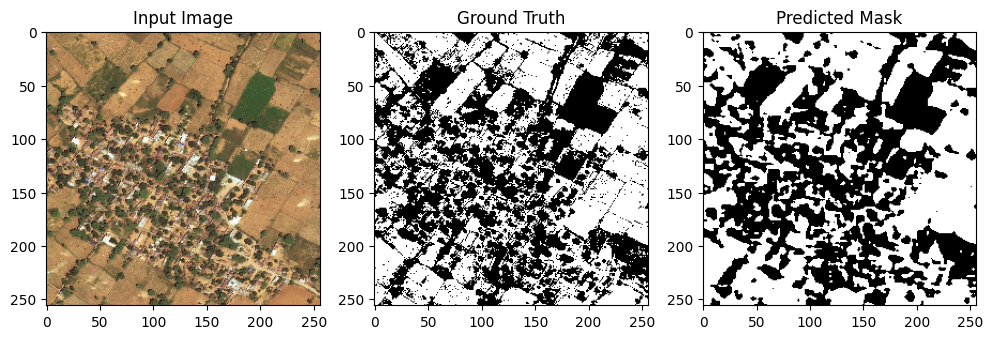

In [6]:
import matplotlib.pyplot as plt
# ============================
# Plot Accuracy & Loss
# ============================
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

# ============================
# Visualize Predictions
# ============================
def visualize_predictions(model, image_paths, mask_paths, count=4):
    indices = np.random.choice(len(image_paths), count)
    for idx in indices:
        img, true_mask = load_image_mask(image_paths[idx], mask_paths[idx])
        pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
        pred_mask = (pred_mask > 0.5).astype(np.uint8)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title("Input Image")

        plt.subplot(1, 3, 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title("Ground Truth")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask.squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.show()

visualize_predictions(model, val_images, val_masks)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

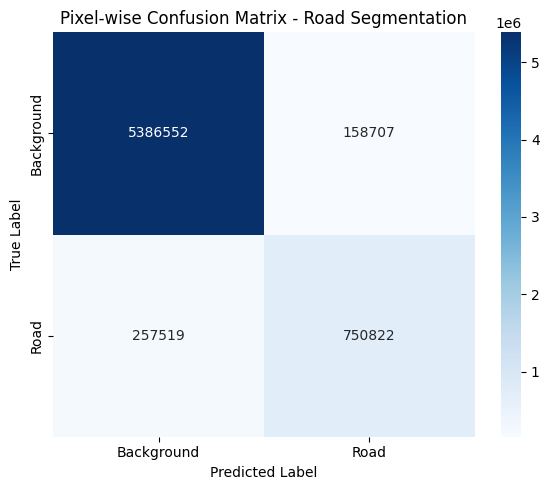

Classification Report:
              precision    recall  f1-score   support

  Background       0.95      0.97      0.96   5545259
        Road       0.83      0.74      0.78   1008341

    accuracy                           0.94   6553600
   macro avg       0.89      0.86      0.87   6553600
weighted avg       0.93      0.94      0.94   6553600



In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix_heatmap(model, image_paths, mask_paths, threshold=0.5, samples=100):
    y_true_all = []
    y_pred_all = []

    for i in range(min(samples, len(image_paths))):
        img, true_mask = load_image_mask(image_paths[i], mask_paths[i])
        pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
        pred_mask = (pred_mask > threshold).astype(np.uint8)

        y_true_all.extend(true_mask.flatten())
        y_pred_all.extend(pred_mask.flatten())

    cm = confusion_matrix(y_true_all, y_pred_all)
    labels = ['Background', 'Road']

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Pixel-wise Confusion Matrix - Road Segmentation')
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=labels))

    return cm
cm = plot_confusion_matrix_heatmap(model, val_images, val_masks)
